In [92]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [93]:
df=pd.read_csv("flightdata.csv")   #veri setimizi ekliyoruz
df.shape                        #veri setimizin boyutuna bakıyourz

(11231, 26)

kayıp değer olma durumunu kontrol ediyoruz. True değer dönüyorsa kayıp değerlerimiz var demektir

In [94]:
df.isnull().values.any()          

True

In [95]:
df.isnull().sum()        #Kayıp değerlerin kaç tane ve  nerede olduğuna bakıyoruz

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [96]:
df.drop('Unnamed: 25',axis=1,inplace=True)    #bu sütun tamamen kayıp veriden oluşuyor. o yüzden silebiliriz
df.head()      

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


gerekli olan değişkenlerimizi seçiyoruz

In [97]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [98]:
df.isnull().sum()          #kayıp veri kontrolunu tekrardan yapıyoruz

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [99]:
df = df.fillna({'ARR_DEL15': 1})     #nan değerleri modelimizde kullanabilmek için 1 e çeviriyoruz
df.isnull().sum()      

MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
ARR_DEL15       0
dtype: int64

In [100]:
df.describe().T          

,count,mean,std,min,25%,50%,75%,max
MONTH,11231.0,6.628973,3.354678,1.0,4.0,7.0,9.0,12.0
DAY_OF_MONTH,11231.0,15.790758,8.782056,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,11231.0,3.960199,1.995257,1.0,2.0,4.0,6.0,7.0
CRS_DEP_TIME,11231.0,1320.798326,490.737845,10.0,905.0,1320.0,1735.0,2359.0
ARR_DEL15,11231.0,0.139168,0.346138,0.0,0.0,0.0,0.0,1.0


In [101]:
df=pd.get_dummies(df, columns=['ORIGIN', 'DEST'])    #modelimizde kullanabilmek için orıgın ve dest kolonları ekliyoruz
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,1905,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,1345,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,940,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,819,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,2300,0.0,0,0,0,0,1,0,1,0,0,0


Crs_Dep_time ı 100 e bölüp 24 saatliki dilimdeki karşılığını bulmalıyız

In [102]:
df['CRS_DEP_TIME']=df['CRS_DEP_TIME']//100
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


In [103]:
x=df.drop('ARR_DEL15',axis=1)    #bağımlı ve bağımsız değişkenimizi ayırıyoruz
y=df['ARR_DEL15']

In [104]:
y.value_counts()

0.0    9668
1.0    1563
Name: ARR_DEL15, dtype: int64

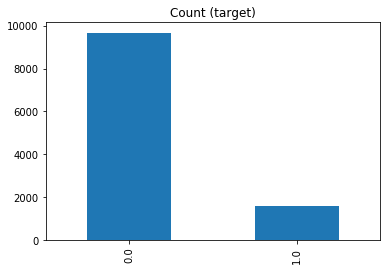

In [105]:
y.value_counts().plot(kind='bar', title='Count (target)');    # bağımlı değişkenin bar grafiği

veri setimizde bir dengesizlik görülüyor. bunu ilerleyen kodlarda düzelticez

In [106]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42 )  

Veri setimizi train ve test olmak üzere ayırıyoruz

### Veri setimizi düzenlediğimize göre model kurmaya geçebiliriz

In [107]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import accuracy_score, classification_report       

Veri setimizi dengesiz (imbalanced dataset) olduğu için azınlık sınıfa (rötar olma ihtimali =0 olan class) daha yüksek bi ağırlık değeri girebiliriz. Böylelikle modelimizin daha iyi eğitilmesini sağlamış oluruz

In [108]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train))) 

yukarıda ağırlık kat sayısını hesapladık ve bunu modelimize yollayacağız.

In [109]:
lgbm_model=LGBMClassifier(class_weight=class_weights).fit(X_train,y_train)        #modelimizi fit ediyoruz

In [110]:
y_pred=lgbm_model.predict(X_test)                   #oluşturduğumuz model ile X_test değerlerini tahmin edioruz

In [111]:
accuracy_score(y_test,y_pred)                      # modelin doğruluk oranını buluyoruz

0.7560541310541311

In [112]:
print(classification_report(y_test,y_pred))       

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      2421
         1.0       0.30      0.59      0.40       387

    accuracy                           0.76      2808
   macro avg       0.61      0.69      0.62      2808
weighted avg       0.84      0.76      0.79      2808



In [113]:
from sklearn.metrics import confusion_matrix                 #modelimizin confusion matrixini oluşturuyoruz
confusion_matrix(y_test,y_pred)

array([[1893,  528],
       [ 157,  230]], dtype=int64)

Modelimizin doğruluğunu ölçmek için ROC AUC kullanacağız.

In [114]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_proba= lgbm_model.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])

0.7608212806333898

ROC Eğrisini çizelim

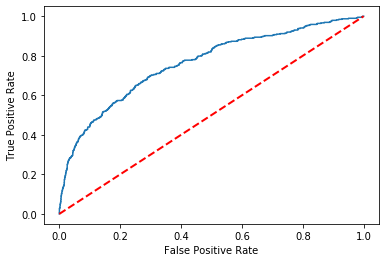

In [115]:
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

Yapıcağımız fonksiyon ile alıcağımız tarih, kalkış havalimanı ve varış havalimanı bilgileri ile uçağın zamanında gitme olasılığını bulacağız. Olasılığı hesaplarken kurmuş olduğumuz lgbm_model den yararlanacağız

In [116]:
def possibility_delay(date_time,origin,dest):
    
    flight_date = datetime.strptime(date_time, '%d/%m/%Y %H:%M:%S')
    month = flight_date.month
    day = flight_date.day
    day_of_week = flight_date.isoweekday()
    hour = flight_date.hour
    
    origin = origin.upper()
    dest = dest.upper()
    
    new_data = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if dest == 'ATL' else 0,
              'DEST_DTW': 1 if dest == 'DTW' else 0,
              'DEST_JFK': 1 if dest == 'JFK' else 0,
              'DEST_MSP': 1 if dest == 'MSP' else 0,
              'DEST_SEA': 1 if dest == 'SEA' else 0 }]

    return lgbm_model.predict_proba(pd.DataFrame(new_data))[0][0]

### bazı günlerdeki uçuşların rötar yapma ihtimaline bakalım şimdi de

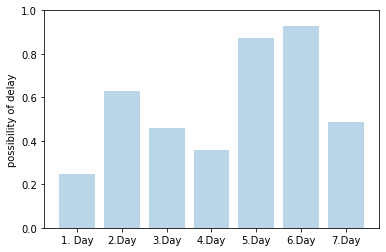

In [117]:
days = ('1. Day', '2.Day', '3.Day', '4.Day', '5.Day', '6.Day', '7.Day')
date_and_flight = (possibility_delay('1/7/2018 12:00:00', 'ATL', 'jfk'),
          possibility_delay('2/5/2016 20:00:00', 'DTW', 'SEA'),
          possibility_delay('2/6/2019 12:00:00', 'JFK', 'SEA'),
          possibility_delay('4/7/2017 12:00:00', 'MSP', 'ATL'),
          possibility_delay('22/10/2018 22:00:00', 'SEA', 'DTW'),
          possibility_delay('13/11/2019 17:00:00', 'DTW', 'MSP'),
          possibility_delay('9/12/2017 12:00:00', 'ATL', 'JFK'))

plt.bar(days, date_and_flight, align='center', alpha=0.3)
plt.ylabel('possibility of delay')
plt.ylim((0,1));

https://www.linkedin.com/in/onur-y%C4%B1lmaz-9a58a11a2/